In [145]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters
from scipy.signal import deconvolve

# Import measured Ar spectrum

In [53]:
bg_file = 'Subt2_09-55-33-206.txt'
ar_file = 'Subt2_09-57-43-716.txt'

In [54]:
bg = np.loadtxt(bg_file, skiprows=14)
ar = np.loadtxt(ar_file, skiprows=14)

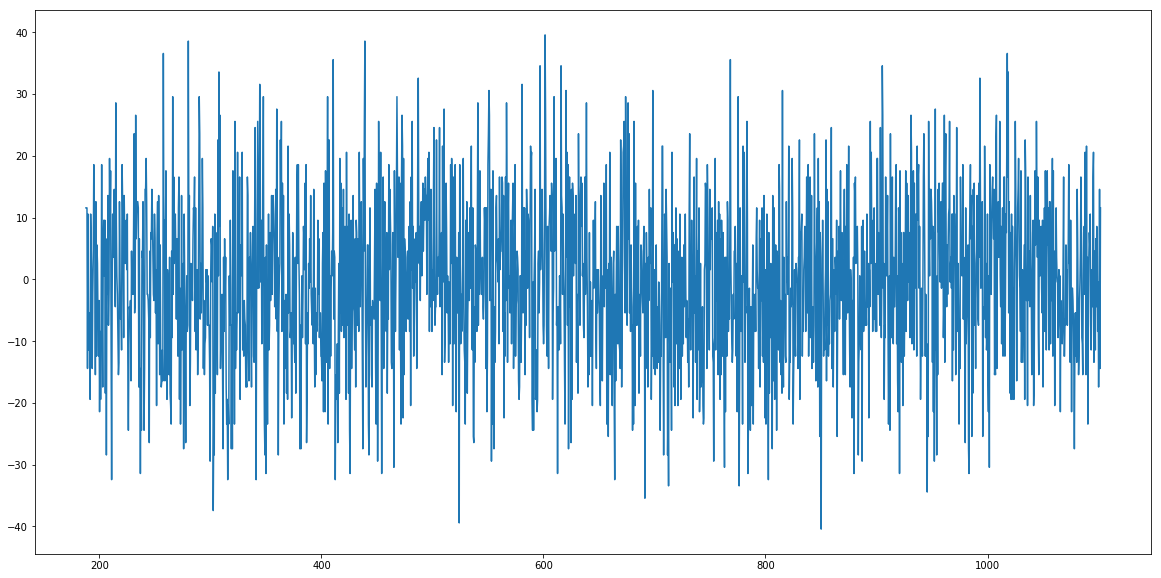

In [55]:
plt.figure(figsize=(20,10))
plt.plot(bg[:,0], bg[:,1])
plt.show()

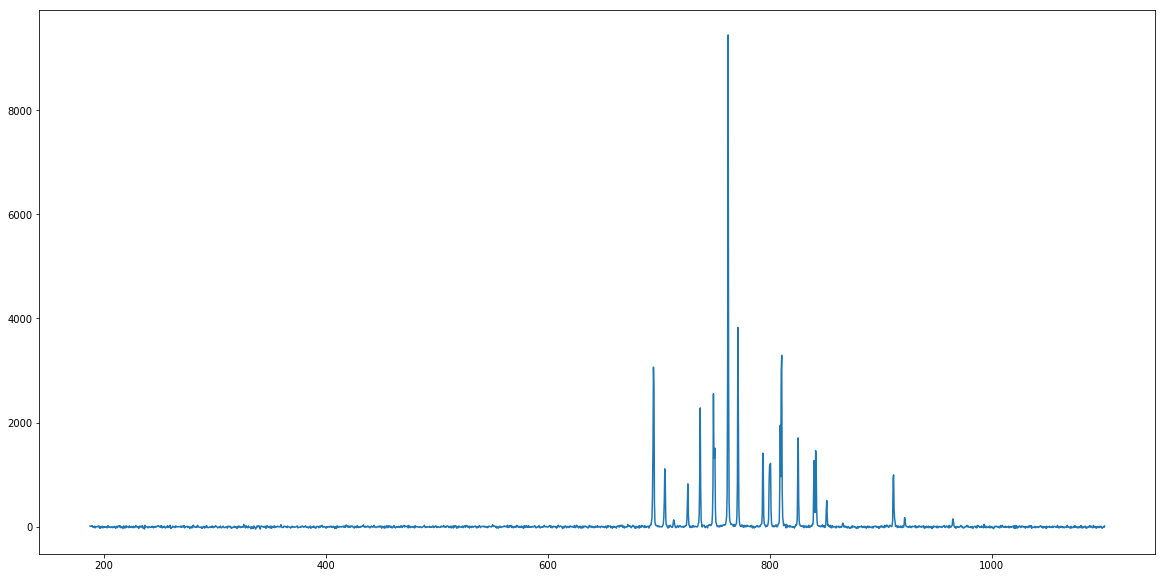

In [56]:
plt.figure(figsize=(20,10))
plt.plot(ar[:,0], ar[:,1])
plt.show()

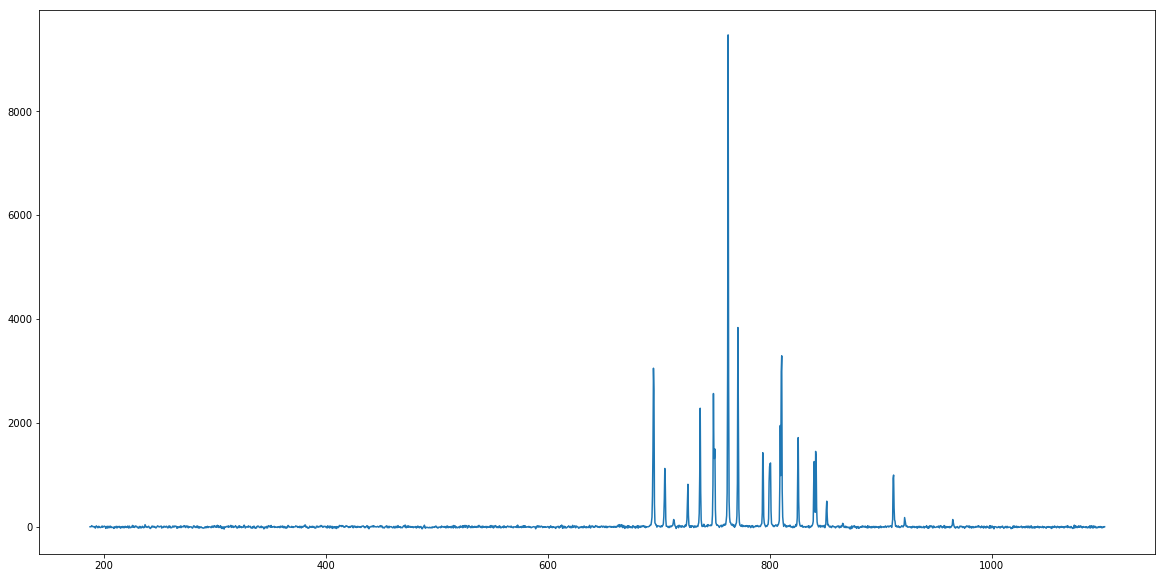

In [57]:
plt.figure(figsize=(20,10))
plt.plot(ar[:,0], ar[:,1] - bg[:,1])
plt.show()

# Load Ar peaks

In [64]:
ar_peaks = [
    377.04,
    394.90,
    404.44,
    415.86,
    416.42,
    418.19,
    419.07,
    419.10,
    419.83,
    420.07,
    425.12,
    425.94,
    426.63,
    427.22,
    430.01,
    433.36,
    433.53,
    434.52,
    451.07,
    452.23,
    518.77,
    549.59,
    555.87,
    560.67,
    565.07,
    588.86,
    591.21,
    603.21,
    604.32,
    605.94,
    638.47,
    641.63,
    667.73,
    675.28,
    687.13,
    693.77,
    696.54,
    703.03,
    706.72,
    706.87,
    710.75,
    712.58,
    714.70,
    720.70,
    727.29,
    731.17,
    731.60,
    735.33,
    737.21,
    738.40,
    739.30,
    743.54,
    750.39,
    751.47,
    763.51,
    772.38,
    772.42,
    794.82,
    800.62,
    801.48,
    810.37,
    811.53,
    826.45,
    839.23,
    840.82,
    842.46,
    852.14,
    866.79,
    884.99,
    907.54,
    912.30,
    919.46,
    922.45,
    929.15,
    935.42,
    965.78,
    978.45
]

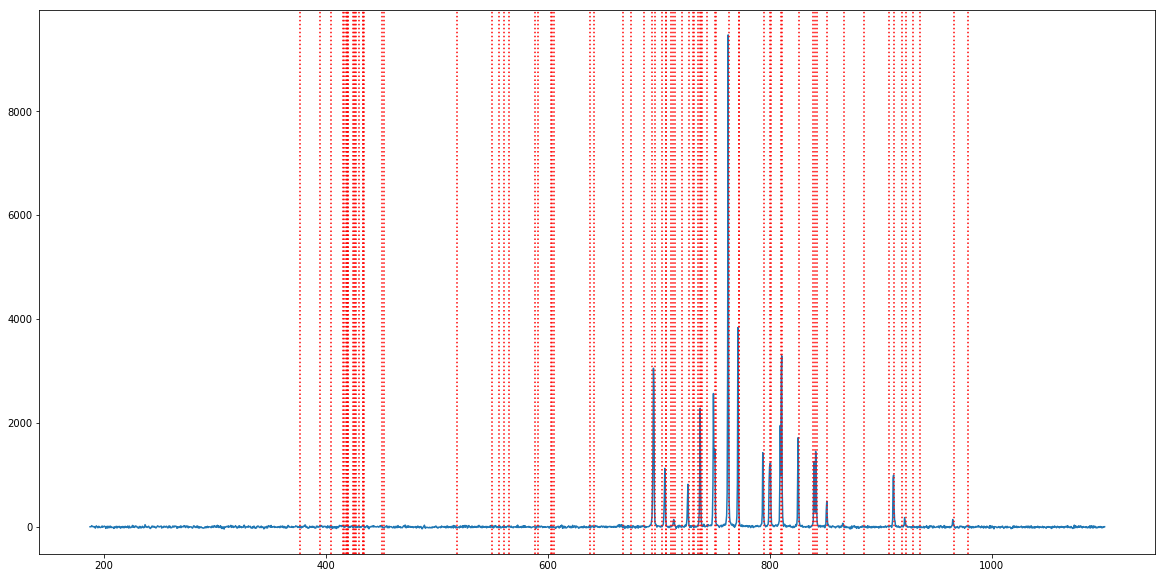

In [69]:
fig = plt.figure(figsize=(20,10))
plt.plot(ar[:,0], ar[:,1] - bg[:,1])
for peak in ar_peaks:
    plt.axvline(peak, color='r', linestyle=':')
plt.show()

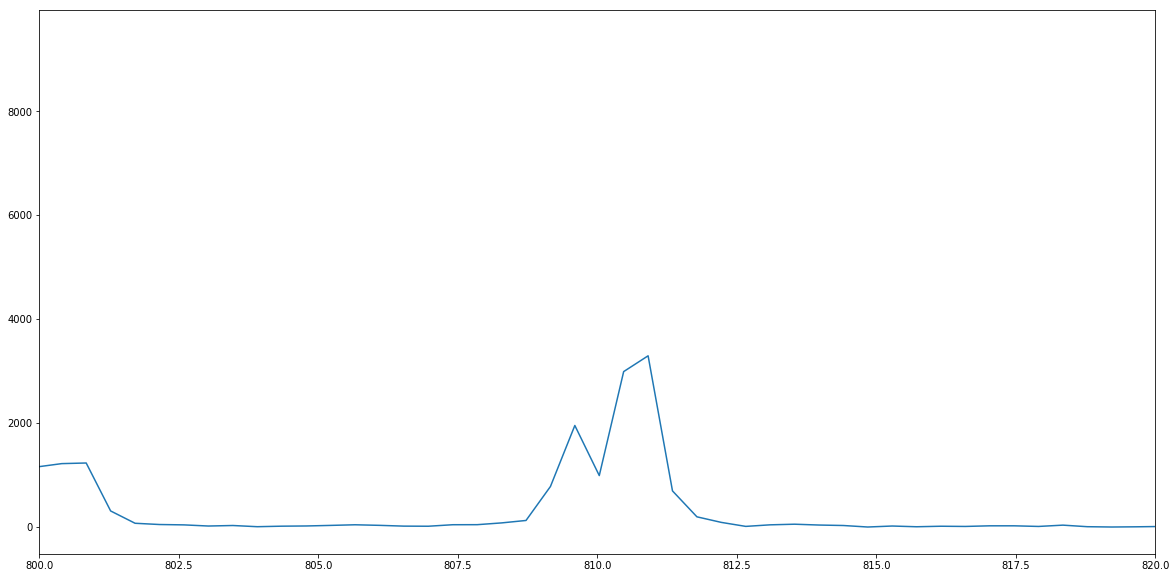

In [60]:
fig = plt.figure(figsize=(20,10))
plt.plot(ar[:,0], ar[:,1] - bg[:,1])
for peak in ar_peaks:
    plt.axvline(peak, color='r', linestyle=':')
plt.xlim(800, 820)
plt.show()

(3, 3)
0	0
0	1
0	2
1	0
1	1
1	2
2	0
2	1
2	2
3	0


IndexError: index 3 is out of bounds for axis 0 with size 3

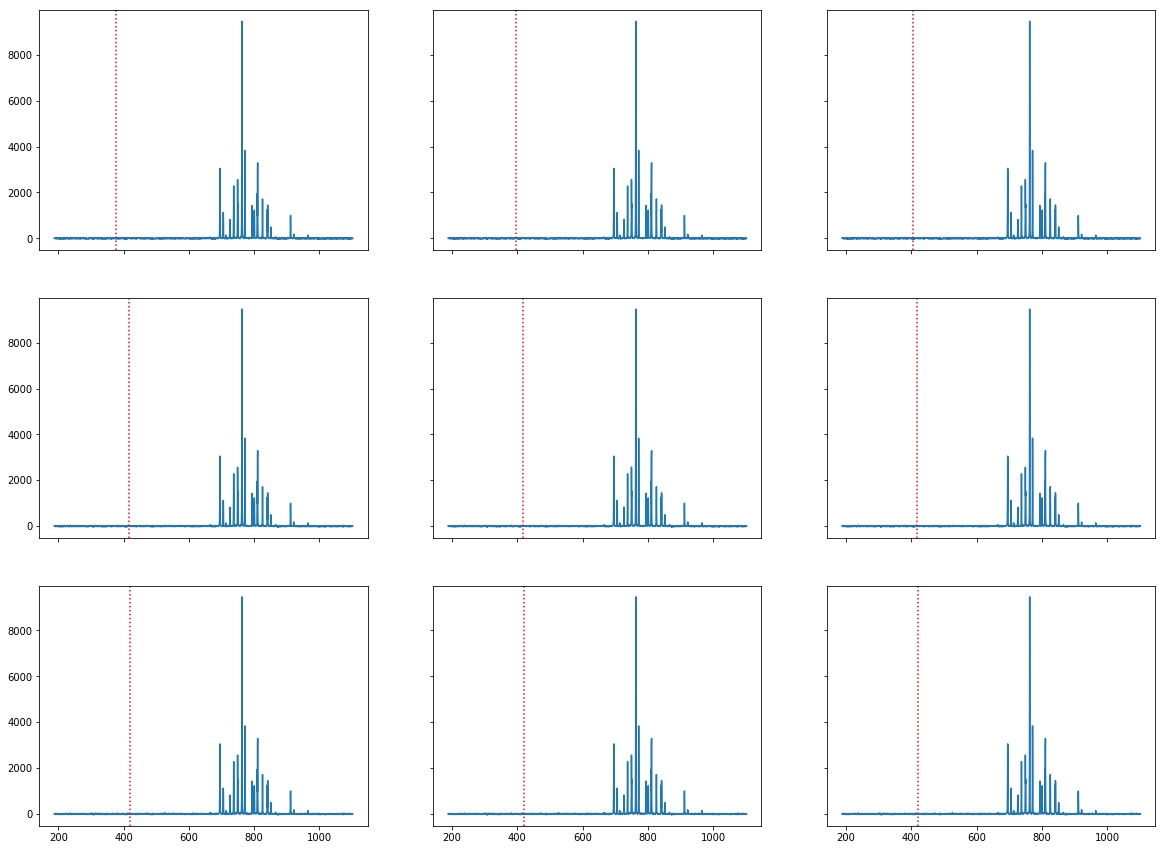

In [72]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True, figsize=(20, 15))

print(axs.shape)

useful_peaks = []

ix = 0

for peak in useful_peaks:
    print("{}\t{}".format(ix//3,ix%3))
    ax = axs[ix//3,ix%3]
    ax.plot(ar[:,0], ar[:,1] - bg[:,1])
    ax.axvline(peak, color='r', linestyle=':')
    # ax.set_xlim(peak*0.9, peak*1.1)
    ix += 1

plt.show()

print(ix)

# Noise Removal

Find sigma of largest peak

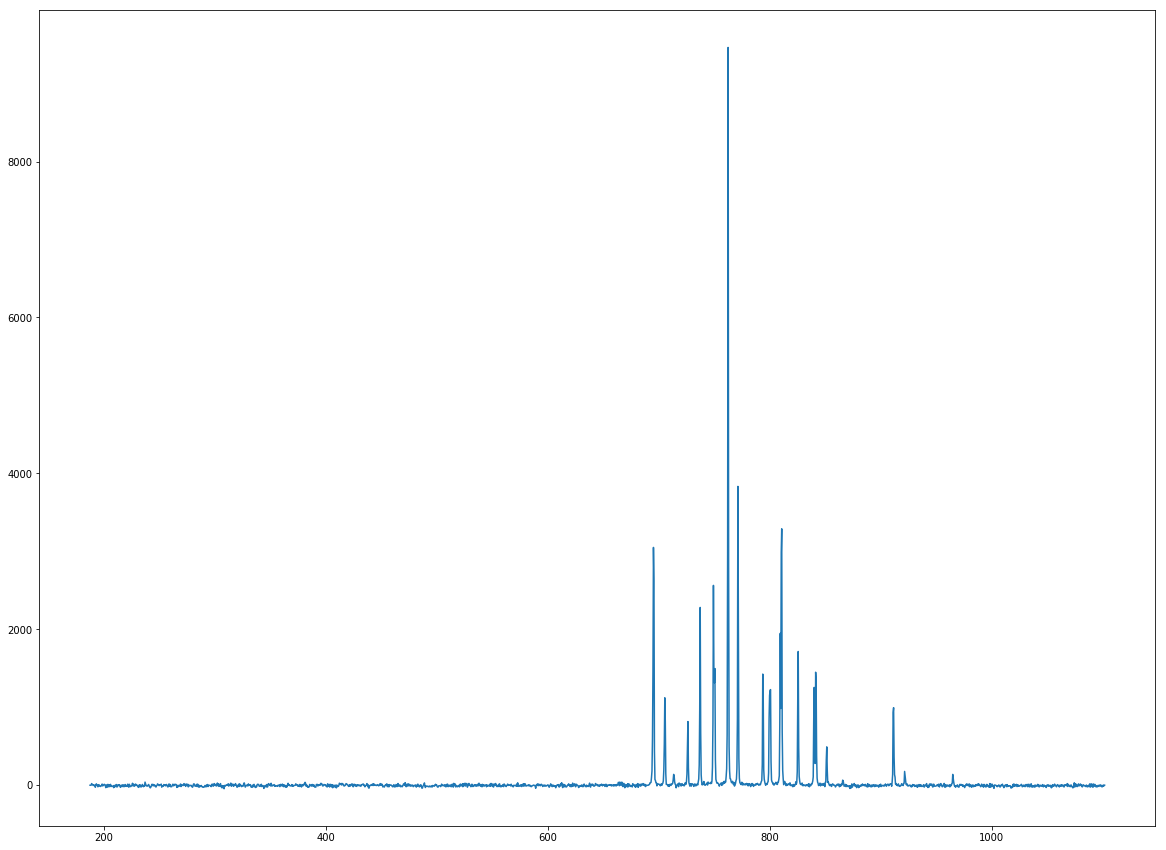

In [74]:
fig = plt.figure(figsize=(20,15))
plt.plot(ar[:,0], ar[:,1] - bg[:,1])
plt.show()

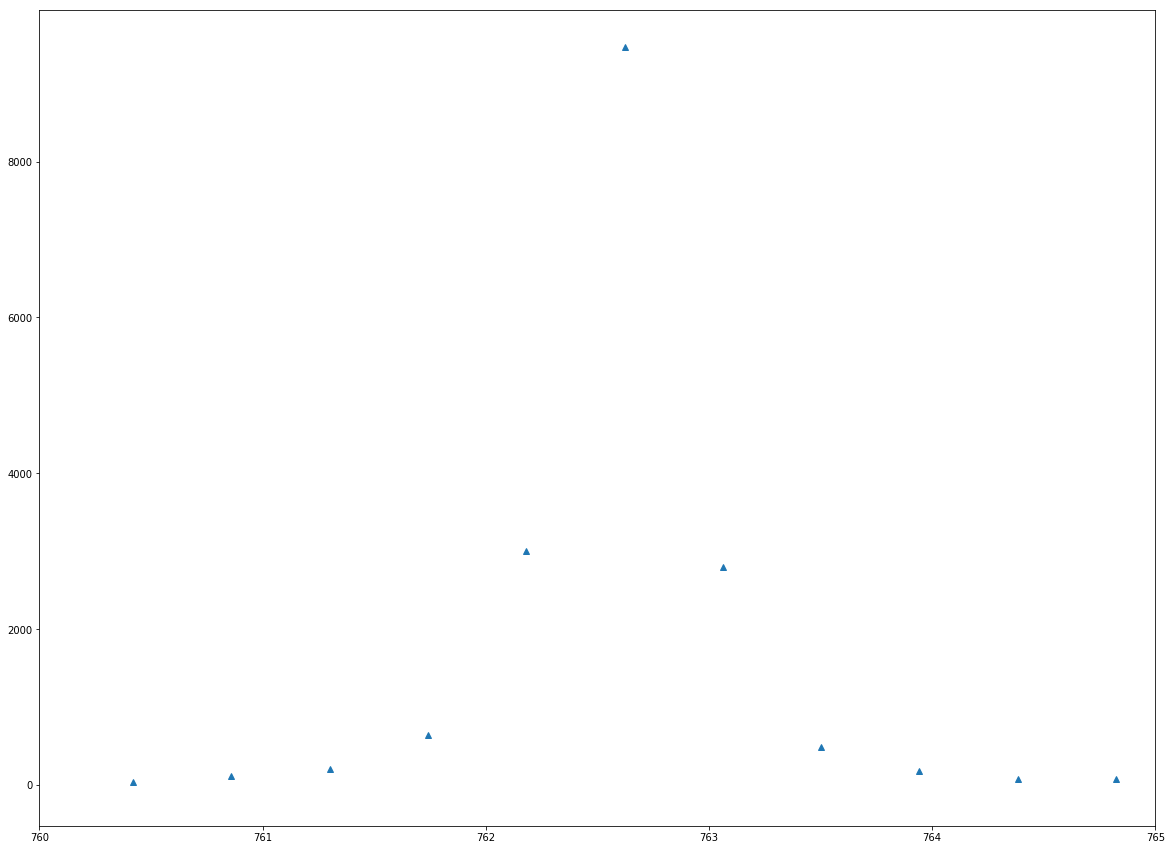

In [78]:
fig = plt.figure(figsize=(20,15))
plt.plot(ar[:,0], ar[:,1] - bg[:,1], '^')
plt.xlim(760, 765)
plt.show()

In [141]:
def gauss(x, intensity=1, std=1, mean=0):
    try:
        return intensity / np.sqrt(2 * np.pi * std ** 2) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))
    except ValueError as e:
        print(x.shape)
        raise e

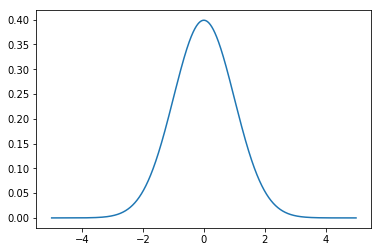

In [87]:
x = np.linspace(-5, 5, 100000)
plt.plot(x, gauss(x))
plt.show()

In [88]:
np.pi

3.141592653589793

In [95]:
ar_temp = ar[ar[:,0] > 760]
ar_filt = ar_temp[ar_temp[:,0] < 765]

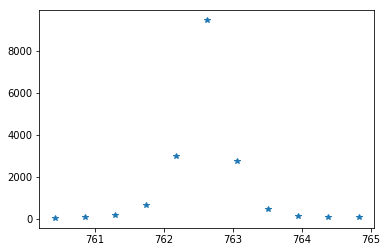

In [98]:
plt.plot(ar_filt[:,0], ar_filt[:,1], '*')
plt.show()

In [102]:
m = Model(gauss)

In [103]:
m.param_names

['mean', 'std', 'intensity']

In [109]:
params = m.make_params(mean=762.7, intensity=9000, std=1)

In [107]:
m.independent_vars

['x']

In [114]:
ar_filt.shape

(11, 2)

In [111]:
result = m.fit(ar_filt[:,1], mean=762.7, std=1, intensity=9000, x=ar_filt[:,0])

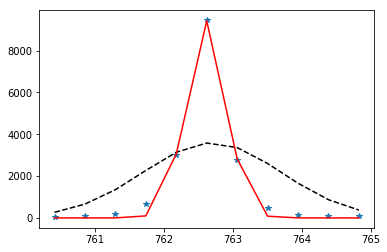

In [116]:
plt.plot(ar_filt[:,0], ar_filt[:,1], '*')
plt.plot(ar_filt[:,0], result.init_fit, 'k--')
plt.plot(ar_filt[:,0], result.best_fit, 'r-')
plt.show()

In [117]:
result.params

Parameters([('mean',
             <Parameter 'mean', value=762.614696665887 +/- 0.0123, bounds=[-inf:inf]>),
            ('std',
             <Parameter 'std', value=0.2885869420712271 +/- 0.00873, bounds=[-inf:inf]>),
            ('intensity',
             <Parameter 'intensity', value=6816.463633516785 +/- 220, bounds=[-inf:inf]>)])

In [122]:
std = result.best_values['std']

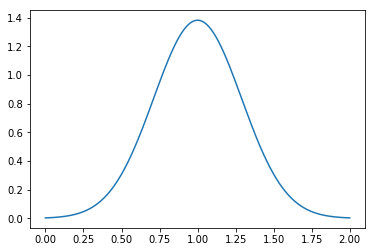

In [208]:
x = np.linspace(0, 2, 10000)
plt.plot(x, gauss(x, std=std, mean=1))
plt.show()

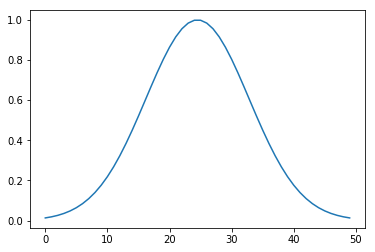

In [127]:
plt.plot(np.exp(-( (np.linspace(0,50)-25.)/float(12))**2 ))
plt.show()

In [197]:
gk = gauss(x=np.linspace(ar[0,0], ar[4,0], 4), mean=(ar[0,0]+ar[4,0])/2, std=std)

In [198]:
ar[:,0].min()+2

189.836

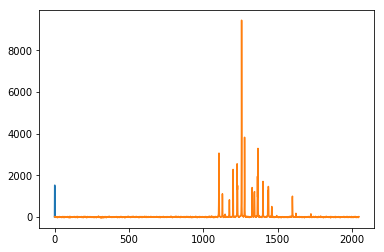

In [199]:
plt.plot(gk*2000)
plt.plot(ar[:,1])
plt.show()

In [200]:
q, r = deconvolve(ar[:,1], gk)

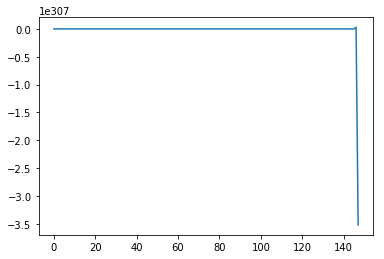

In [201]:
plt.plot(q)

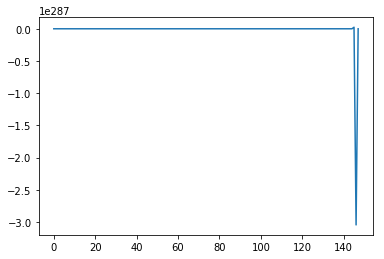

In [202]:
plt.plot(r)

In [203]:
sig

{'intensity': 6816.463633516785,
 'mean': 762.614696665887,
 'std': 0.2885869420712271}

In [204]:
sig['std']

0.2885869420712271

In [205]:
gk

array([0.00641602, 0.76097481, 0.76097481, 0.00641602])

In [206]:
(ar[-1,1] - ar[0,1])/ar[:,1].shape[0]

0.00048828125

In [207]:
ar.shape

(2048, 2)